## Exercise 


For this exercise, you will be working with the [House Price Dataset](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/code).

Please grab the train.csv file from Kaggle and explore this dataset. You need to perform explroatory data analysis and see if there is any correlation between the variables and analyze the distribution of the dataset. The question is open-ended and basically you're asked to perform EDA. 


1- Write a summary of your findings in one page (e.g., summary statistics, plots) and submit the pdf file. Therefore, for part 3 of your assignment, you need to submit at least one jupyter notebook file and one pdf file.


2- Push your code and project to github and provide the link to your code here. Ensure that your github project is organized to at least couple of main folders, ensure that you have the README file as well:


- Src
- Data
- Docs
- Results

Read this link for further info:  https://gist.github.com/ericmjl/27e50331f24db3e8f957d1fe7bbbe510





In [129]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [66]:
sns.set()

In [67]:
df= pd.read_csv('train.csv')

In [163]:
df.head(8)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Let's get some insights about Saleprice

In [74]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

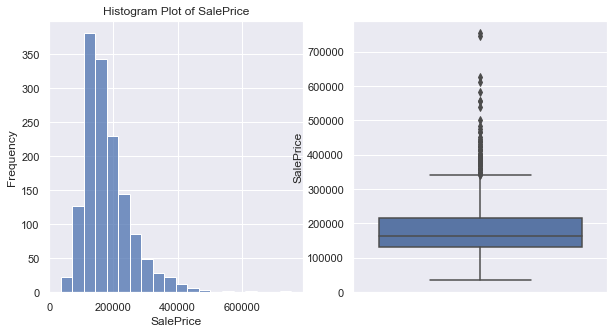

In [164]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(df['SalePrice'], bins=20)
plt.ylabel("Frequency")
plt.title("Histogram Plot of SalePrice")
plt.title("Histogram Plot of SalePrice")

plt.subplot(1,2,2)
sns.boxplot(y= 'SalePrice', data=df)
plt.show()

## It is right-skewed with many outliers.

# Relation between Saleprice and the top 3 correlated ones

In [90]:
df.corr()['SalePrice'].sort_values(ascending=False, key=abs).head(4)

SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
Name: SalePrice, dtype: float64

In [79]:
corrwithprice= df[['SalePrice','OverallQual','GrLivArea','GarageCars']]

In [80]:
corrwithprice.corr()

,SalePrice,OverallQual,GrLivArea,GarageCars
SalePrice,1.000000,0.790982,0.708624,0.640409
OverallQual,0.790982,1.000000,0.593007,0.600671
GrLivArea,0.708624,0.593007,1.000000,0.467247
GarageCars,0.640409,0.600671,0.467247,1.000000


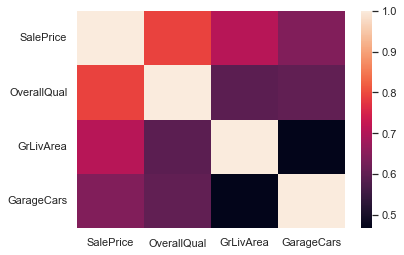

In [166]:
sns.heatmap(corrwithprice.corr())
plt.show()

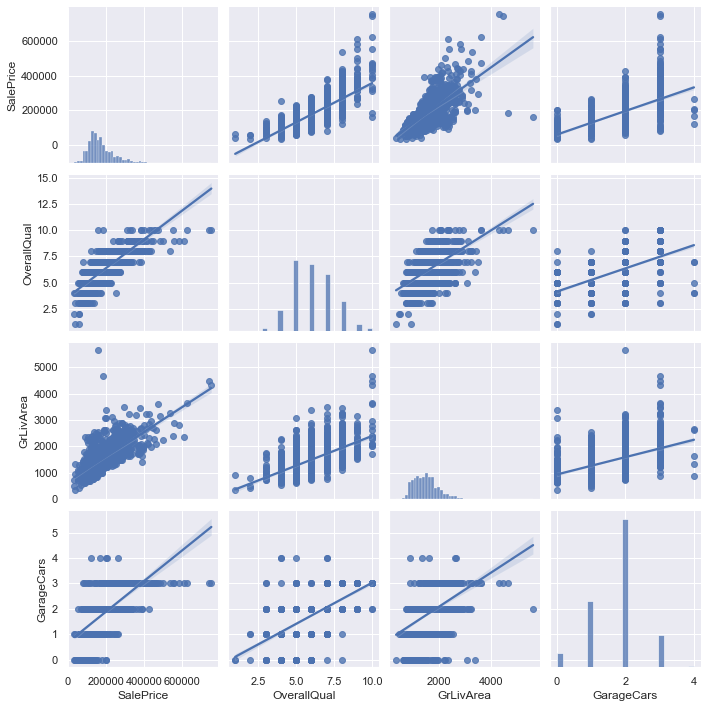

In [96]:
sns.pairplot(corrwithprice,palette="dark", kind="reg") 
plt.show()

##  Garagecars is a discrete numerical variable. Apart from that, Grlivarea and Overalqual seem to have a reasonable linear relation with Salesprice. So it is possible to predict the price put of these two variables.


# Let's investigate the relation with some selected categorical variables, such as Salecondition and Lotconfig.

## For barplot due to outliers I decided to draw that with the median.

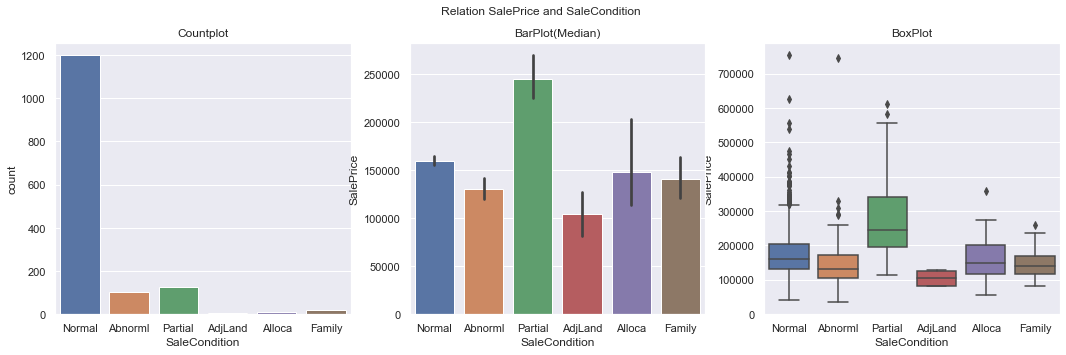

In [142]:
plt.figure(figsize = (18,5))
plt.subplot(1,3,3)
sns.boxplot(x=df['SaleCondition'],y=df['SalePrice'])
plt.title("BoxPlot")

plt.subplot(1,3,1)
sns.countplot(x=df['SaleCondition'])
plt.title("Countplot")

plt.subplot(1,3,2)
sns.barplot(x=df['SaleCondition'],y=df["SalePrice"],estimator=np.median)
plt.title("BarPlot(Median)")

plt.suptitle("Relation SalePrice and SaleCondition")
plt.show()

## Firs of all, it is obvious that SalePrice is strongly associated with the Salecondition. Some of the medians are outisde of the others' boxes, and the medians from barplot are highly varied. While partial sale has the highest mean and the widest distribution(IQR), Normal sale has the max amount which is outlier, resulting in having the widest Range.It is also notable that this result is derived while Normal is by far the most common SaleCondition. Adjland has the lowest variance(distribition), with relatively no whisker.

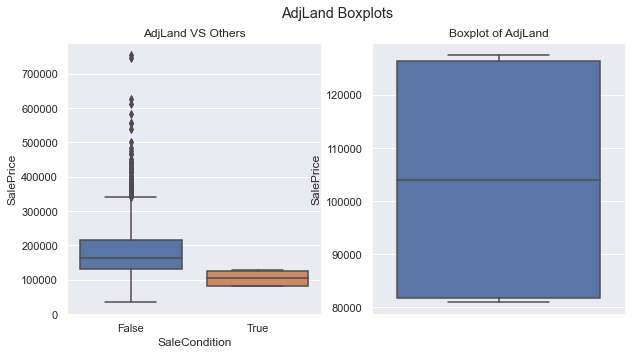

In [119]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(x=df['SaleCondition']=='AdjLand', y=df['SalePrice'])
plt.title("AdjLand VS Others")
plt.subplot(1,2,2)
sns.boxplot(y=df[df['SaleCondition']=='AdjLand']['SalePrice'])
plt.title("Boxplot of AdjLand")
plt.suptitle('AdjLand Boxplots')
plt.show()

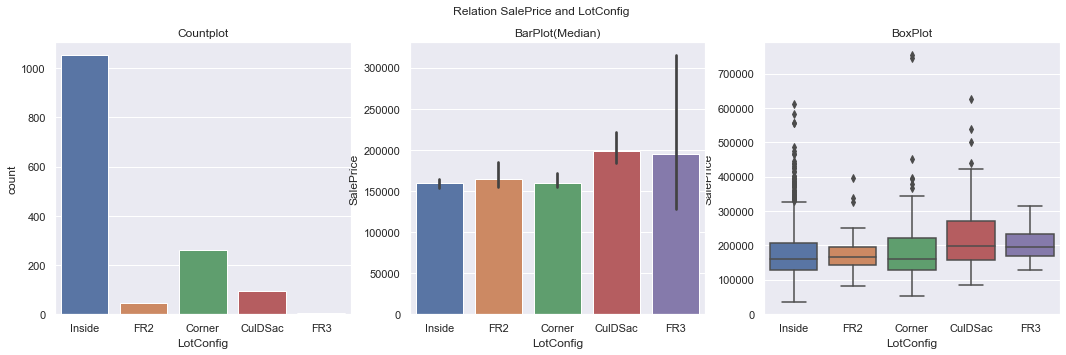

In [143]:
plt.figure(figsize = (18,5))
plt.subplot(1,3,3)
sns.boxplot(x=df['LotConfig'],y=df['SalePrice'])
plt.title("BoxPlot")

plt.subplot(1,3,1)
sns.countplot(x=df['LotConfig'])
plt.title("Countplot")

plt.subplot(1,3,2)
sns.barplot(x=df['LotConfig'],y=df["SalePrice"],estimator=np.median)
plt.title("BarPlot(Median)")

plt.suptitle("Relation SalePrice and LotConfig")
plt.show()

# It is surprizing that Inside stands last in terms of saleprice while it is the most prodominant feature. FR3 is relatively thinly scatterd, which might be the reason of having no outlier. There is only 4 observations of FR3. Duo to outliers it is better to compare barchart with median. Cul De Sac has still the highest SalePrie, with coming FR3 in the next rank. While Corner has the highest saleprice(outlier), the median of it is close to the FR2 and Inside.